In [20]:
from scipy.special import expit
from rbm import RBM
from sampler import VanillaSampler, PartitionedSampler
from trainer import VanillaTrainier
import numpy as np
import datasets, performance, plotter, mnist, pickle, rbm

%matplotlib inline

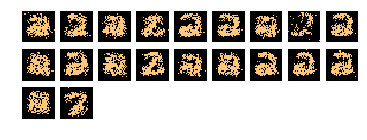

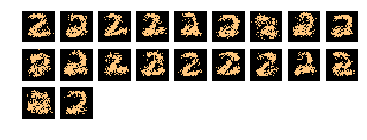

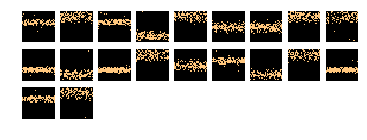

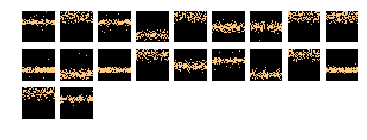

In [2]:
# load the data
with open('./models/bar_model', 'rb') as f1:
    bar_model = pickle.load(f1)

with open('./models/two_model', 'rb') as f2:
    two_model = pickle.load(f2)

num_items = 20
bar = bar_model.visible[:num_items]
two = two_model.visible[:num_items]
composite = datasets.composite_datasets(bar, two)

part_sampler = PartitionedSampler(two_model, bar_model, num_items= num_items)
van_two_sampler = VanillaSampler(two_model)
van_bar_sampler = VanillaSampler(bar_model)


vis_van_a = van_two_sampler.reconstruction_given_visible(composite)
vis_van_b = van_bar_sampler.reconstruction_given_visible(composite)

vis_target_a = van_two_sampler.reconstruction_given_visible(two)
vis_target_b = van_bar_sampler.reconstruction_given_visible(bar)


    

plotter.plot(vis_van_a)
plotter.plot(vis_target_a)

plotter.plot(vis_van_b)
plotter.plot(vis_target_b)
# score_part_a = performance.log_likelyhood_score(vis_part_a, vis_target_a)
# score_van_a = performance.log_likelyhood_score(vis_van_a, vis_target_a)

# score_part_b = performance.log_likelyhood_score(vis_part_b, vis_target_b)
# score_van_b = performance.log_likelyhood_score(vis_van_b, vis_target_b)


0.0% complete
5.0% complete
10.0% complete
15.0% complete
20.0% complete
25.0% complete
30.0% complete
35.0% complete
40.0% complete
45.0% complete
50.0% complete
55.00000000000001% complete
60.0% complete
65.0% complete
70.0% complete
75.0% complete
80.0% complete
85.0% complete
90.0% complete
95.0% complete


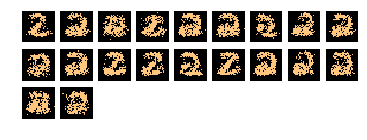

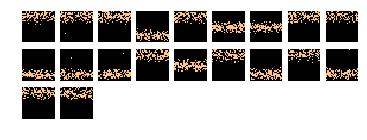

In [3]:
vis_part_a, vis_part_b = part_sampler.reconstructions_given_visible(composite, num_samples = 40)
plotter.plot(vis_part_a)
plotter.plot(vis_part_b)

In [18]:
from scipy.special import xlogy
import math

def log_likelyhood_score(sample, target):
    """Lets find the log likelyhood"""
    # we need the actual visible pattern that we want to compute the score for
    # if vi|ha is 400 | 786
    # and actual vi is 400 | 786 we are in business
    
    safe_log_sample = np.where(sample != 0, np.log(sample), 0)

    sample_off = 1 - sample
    safe_log_off_sample = np.where(sample_off != 0, np.log(sample_off), 0)
    
    score = ((target * safe_log_sample) + ((1 - target) * safe_log_off_sample))

    score_sum = score.sum()
    return score_sum

score_part_a = log_likelyhood_score(vis_part_a, vis_target_a)
score_van_a = log_likelyhood_score(vis_van_a, vis_target_a)

score_part_b = log_likelyhood_score(vis_part_b, vis_target_b)
score_van_b = log_likelyhood_score(vis_van_b, vis_target_b)

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


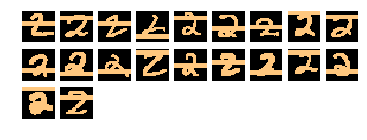

Scores:
	Part_a 0.0	Van_a 0.0
	Part_b 0.0	Van_b 0.0
	A Win?False	B Win?False


In [19]:
plotter.plot(composite)
print("Scores:\n\tPart_a {}\tVan_a {}\n\tPart_b {}\tVan_b {}\n\tA Win?{}\tB Win?{}".format(score_part_a, score_van_a, score_part_b, score_van_b, score_part_a > score_van_a, score_part_b > score_van_b))
# part_a = performance.score(vis_part_a, vis_target_a, two_model.weights, two_model.visible_bias, two_model.hidden_bias)
# van_a = performance.score(vis_van_a, vis_target_a, two_model.weights, two_model.visible_bias, two_model.hidden_bias)
# print((part_a)
# print(van_a)

In [ ]:
p = PartitionedSampler(two_model, bar_model, num_items= num_items)
ha, hb=  p.visible_to_hidden(composite, 100)
def sample(hidden, weights, bias):
    return expit(np.dot(hidden,weights) + bias)
vis = sample(hb, bar_model.weights, bar_model.visible_bias)
plotter.plot(vis)
plotter.plot(composite)

In [3]:
van_two_sampler = VanillaSampler(two_model)
van_bar_sampler = VanillaSampler(bar_model)

In [4]:
vis_van_two = sample((van_two_sampler.visible_to_hidden(composite)), two_model.weights, two_model.visible_bias)
vis_van_bar = sample((van_bar_sampler.visible_to_hidden(composite)), bar_model.weights, bar_model.visible_bias)
goal = sample((van_bar_sampler.visible_to_hidden(bar)), bar_model.weights, bar_model.visible_bias)

NameError: name 'sample' is not defined

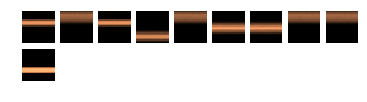

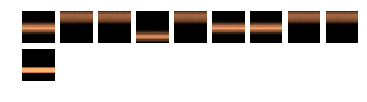

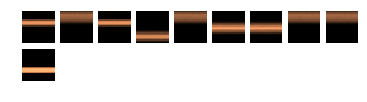

In [16]:
plotter.plot(vis_van_bar)
plotter.plot(vis)
plotter.plot(goal)


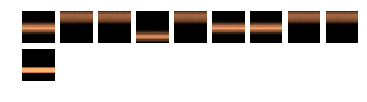

In [17]:
plotter.plot(vis)

In [ ]:
sayHello("a","b",'c','d')

In [22]:
from sklearn.neural_network import BernoulliRBM
print(two.shape)

model = BernoulliRBM(n_components=30, n_iter=500,verbose = 0)
model.fit(two)



(20, 784)


BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=30, n_iter=500,
       random_state=None, verbose=0)

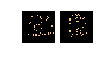

In [16]:
plotter.plot(np.where(model.gibbs(two),1,0))

In [ ]:
import numpy as np
import rbm
from sklearn.linear_model import Perceptron

num_items = 400
bar = datasets.data_set_with_name("bar", size = num_items)
blob = datasets.data_set_with_name("blob", size = num_items)
two = datasets.data_set_with_name(2, size = num_items)
three = datasets.data_set_with_name(3, size = num_items)

def classify(hid_train, train_labels):
    classifier = Perceptron()
    classifier.fit(self.hid_train, self.train_labels)

PartitionedSampler(two_model, bar_model, num_items= num_items)
training = 
train_labels = 

c = classify(hidden_training_set(training, sampler), train_labels)